In [12]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import numpy as np
import plotly.express as px


In [13]:

class flipkart_fashion:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.flipkart.com/search?q={self.items}'   
        self.pageurl2=f'https://www.flipkart.com/search?q={self.items}&page='
    cardClass = '_1xHGtK'
    nameCard='_2WkVRV'
    descriptionClass='IRpwTa'
    priceClass="_30jeq3"
    imageClass='_2r_T1I'
    hrefClass='IRpwTa'
    
class amazon:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2'
        self.pageurl2=f'https://www.amazon.in/s?k={self.items}&ref=nb_sb_noss_2&page='
    cardClass='s-search-result'
    nameCard='a-size-base-plus a-color-base'
    descriptionClass='a-size-base-plus a-color-base a-text-normal'
    priceClass='a-price-whole'
    imageClass='s-image'
    hrefClass='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'
class myntra:
    def __init__(self,itemName) -> None:
        self.items=itemName
        self.pageurl=f'https://www.myntra.com/{self.items}'
        self.pageurl2=f'https://www.myntra.com/{self.items}?p='
    cardClass='product-base'
    nameCard='product-brand'
    descriptionClass='product-product'
    priceClass='product-discountedPrice'
    imageClass='img-responsive'
    hrefClass='_blank'
    

In [14]:
itemName= 'hats'
itemName='%20'.join(itemName.strip().split())


In [15]:
keyWords=[]
itemList=[]

In [16]:
websites = [flipkart_fashion(itemName),amazon(itemName),myntra(itemName)]
namewebsites=['flipkart','amazon','myntra']


itemName ='%20'.join(input().split())


In [17]:

def setlist(item,nameCard,descriptionClass,priceClass,websitewhich,imageClass,hrefClass):
    if str(websitewhich)=='flipkart':
        name=item.find('div',class_=nameCard)
        if name == None:
            name=item.find('a',class_='IRpwTa').text
        else:
            name=name.text
        dis=item.find('a',class_=descriptionClass)['title']
        price=item.find('div',class_=priceClass).text[1:]
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']

        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.flipkart.com'+str(href)]
    elif str(websitewhich)=='amazon':
        name=item.find('span',class_=nameCard).text
        dis=item.find('span',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price='0'
        else:
            price=price.text
        price=''.join(price.split(','))
        img=item.find('img',class_=imageClass)['src']
        href=item.find('a',class_=hrefClass)['href']
        
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.amazon.com'+str(href)]
    elif str(websitewhich)=='myntra':
        name=item.find('h3',class_=nameCard).text
        dis=item.find('h4',class_=descriptionClass).text
        price=item.find('span',class_=priceClass)
        if price==None:
            price=item.find('div',class_='product-price')
            if price==None:
                price='0'
            else:
                price=price.text[3:]
        else:
            price=price.text[3:]
        if item.find('img',class_=imageClass)==None:
            img='not available'
        else:
            img=item.find('img',class_=imageClass)['src']
        href=item.find('a')['href']
        # if len(price)>3:
        #     price=price[3:]
        # if price==None:
        #     price=0
        print(price)
        keyWords.extend(dis.split())
        return [name,dis,float(price),img,'https://www.myntra.com/'+str(href)]
        

In [18]:
WINDOW_SIZE = "1920,1080"
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)

In [19]:
for no,i in enumerate(websites):
    cardClass=i.cardClass
    nameCard=i.nameCard
    descriptionClass=i.descriptionClass
    priceClass=i.priceClass
    imageClass=i.imageClass
    pageurl=i.pageurl
    pageurl2=i.pageurl2
    hrefClass=i.hrefClass
    # itemPage=requests.get(pageurl,headers={'User-Agent': 'Mozilla/5.0'}).content
    for enum in range(1,2):
        
        driver = webdriver.Chrome()
        driver.get(pageurl2+str(enum))
        itemPage=driver.page_source
        idk = BeautifulSoup(itemPage,'html.parser')
        # driver.close()
        if namewebsites[no]=='flipkart':
            itemCards=idk.find_all('div',class_=cardClass)[1:]
        elif namewebsites[no]=='amazon':
            itemCards=idk.find_all('div',{'data-component-type': 's-search-result'})
        elif namewebsites[no]=='myntra':
            itemCards=idk.find_all('li',class_=cardClass)
    

        itemList.extend([setlist(item,nameCard,descriptionClass,priceClass,namewebsites[no],imageClass,hrefClass) for item in itemCards])

 799
 799
 1299
 1349
 981
 1039
 999
 849
 399
 469
 1279
 999
 799
 1999
 1999
 999
 999
 799
 2500
 1299
 1499
 395
 1299
 999
 799
 1299
 1299
 1299
 1299
 1919
 994
 699
 799
 999
 799
 1199
 988
 799
 999
 1285
 735
 679
 2500
 849
 764
 499
 1800
 2000
 999
 999


In [20]:
file=open('temp.txt','w')

In [21]:

print(itemList)
table=pd.DataFrame(itemList)
table=table.sort_values(by=2)
table.to_excel('data.xlsx')



[['ZACHARIAS Fedora Hat Pack of 2', 'ZACHARIAS Fedora Hat Pack of 2', 399.0, 'https://rukminim1.flixcart.com/image/612/612/xif0q/hat/9/i/x/fedora-combo-brown-beige-po2-free-2-fedora-combo-brown-beige-po2-original-imagh7wwgzfyvfpx.jpeg?q=70', 'https://www.flipkart.com/zacharias-fedora-hat-pack-2/p/itm845a6c423c403?pid=HATGH7WWK4ZRB8D4&lid=LSTHATGH7WWK4ZRB8D4A5TKAO&marketplace=FLIPKART&q=hats&store=clo%2Fqd8%2F9gi&srno=s_1_2&otracker=search&iid=0679b924-85dc-48ef-a8f3-e6f0a8133e4f.HATGH7WWK4ZRB8D4.SEARCH&ssid=z36k3n17wg0000001682361408609&qH=f4efffe441219c8e'], ['ZACHARIAS Fishermen Cotton Bucket Hat Cap', 'ZACHARIAS Fishermen Cotton Bucket Hat Cap', 325.0, 'https://rukminim1.flixcart.com/image/612/612/juh9ksw0/hat/z/y/y/bucket-black-free-1-10-2402-zacharias-original-imaffhjgdzykhyee.jpeg?q=70', 'https://www.flipkart.com/zacharias-fishermen-cotton-bucket-hat-cap/p/itmffhjgweanfz7b?pid=HATFFJ4B9H8T8ZYY&lid=LSTHATFFJ4B9H8T8ZYYZA7B7S&marketplace=FLIPKART&q=hats&store=clo%2Fqd8%2F9gi&srno=s_

# here we have multiple rows with same name , lets remove it

In [22]:
unique_values = table.iloc[:,0].unique()
print(unique_values)
uniquevaluedict={}
for i in range(len(table)):
    if table.iloc[i,0] in uniquevaluedict:
        uniquevaluedict[table.iloc[i,0]]+=1
        table.iloc[i,0]=str(table.iloc[i,0])+str(uniquevaluedict[table.iloc[i,0]])
    else:
        uniquevaluedict[table.iloc[i,0]]=1


['FabSeasons' 'Generic'
 'EKAN Kids Sun Protection Beach Party Hat Summer hat For...'
 'malvina bucket' 'EAGLEBUZZ BLACK COTTON HAT PACK OF 1'
 'poshing Bucket Sun Hat Round Cotton Caps for Girls/Wome...'
 'SHRUSTAM BIRTHDAY CAP' 'INFISPACE' 'Missby' 'ZACHARIAS Bucket Hat'
 'Adorazone' 'Missby Sun Hat' 'ZACHARIAS Bucket Cap'
 'ZACHARIAS Fishermen Bucket Hat' 'JAZAA'
 'ZYOZI Dragon Ball Z Theme Birthday Party Hats, Happy Bi...'
 'Highever Daisy Sunflower Embroidered Unisex foldable co...' 'Pelo'
 'Highever Unisex plain cotton foldable beach hat sun hat...'
 'ZACHARIAS Fishermen Cotton Bucket Printed Hat Cap' 'RR DESIGN'
 'Handcuffs' 'X-LENT' 'Zacharias' 'FASHER REVERSIBLE BUCKET'
 'Zipper-G Unisex Cotton Bucket Hat Trendy Outdoor Summer...'
 'ZACHARIAS Fishermen Cotton Bucket Hat Cap' 'HANDCUFFS Bucket hat'
 'Minar hat' 'Zipper-G Unisex Cotton Bucket Hat Trendy Lightweight Ou...'
 'Party Propz 1st Birthday Cap'
 'Vitota Virat Kohli Inspired Baseball Round Cap For Boys...'
 'NUEVOSDAMAS'

In [23]:
from collections import Counter
count=Counter(keyWords)

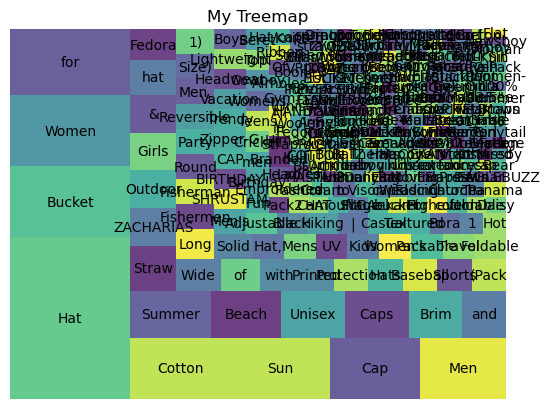

In [24]:
import matplotlib.pyplot as plt
import squarify

# Create a list of strings
mylist = count.keys()

# Assign some random values to the strings
values = count.values()

# Create a dictionary from the list and values
data = dict(zip(mylist, values))

# Sort the dictionary by values
data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

# Create a treemap using squarify
squarify.plot(sizes=data.values(), label=data.keys(), alpha=0.8)
# Add labels and title
plt.axis('off')
plt.title("My Treemap")

# Show the plot
plt.show()


Hey its time for visualizations


ZACHARIAS Fedora Hat Pack of 2 ZACHARIAS Fishermen Cotton Bucket Hat Cap SHRUSTAM BIRTHDAY CAP HASTHIP Plush Animal Bunny Dancing Ears Hat, Rabbit Moving Ear Flaps and Press Paws Minar hat ZACHARIAS Fedora Hat Pack of 2 SHRUSTAM BIRTHDAY CAP EAGLEBUZZ BLACK COTTON HAT PACK OF 1 ZACHARIAS Cotton Camouflage Army Printed Hat Zipper-G Unisex Cotton Bucket Hat Trendy Outdoor Summer Beach Vacation Headwear SHRUSTAM BIRTHDAY CAP SYGA Fisherman Cap HANDCUFFS Bucket hat SYGA Fancy Round Cap ZACHARIAS Fishermen Bucket Hat SHRUSTAM BIRTHDAY CAP Zipper-G Unisex Cotton Bucket Hat Trendy Lightweight Outdoor Hot Fun Summer Beach Vacation Headwear Party Propz 1st Birthday Cap VRITRAZ Beautiful straw hat spring summer children baby boy girl kids unisex printed cartoon fancy dress cap Bear Blue Zipper-G Unisex Cotton Bucket Hat Trendy Lightweight Outdoor Hot Fun Summer Beach Vacation Headwear Futurekart Sun hat for men gustave Mens Sun Hat Wide Brim Summer Sun Cap UV Protection Fishsing Hat Bucket Hat Z

(-0.5, 1499.5, 1499.5, -0.5)

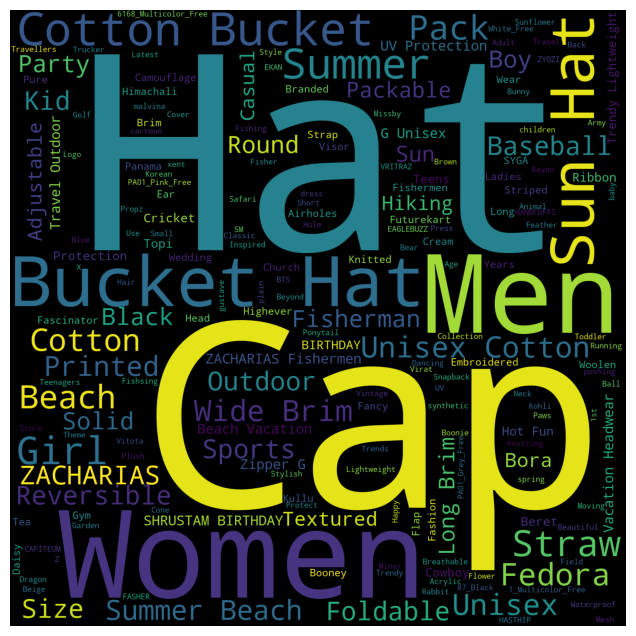

In [25]:
print(' '.join(keyWords))
wordcloud = WordCloud(width = 1500, height = 1500).generate(' '.join(keyWords))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")



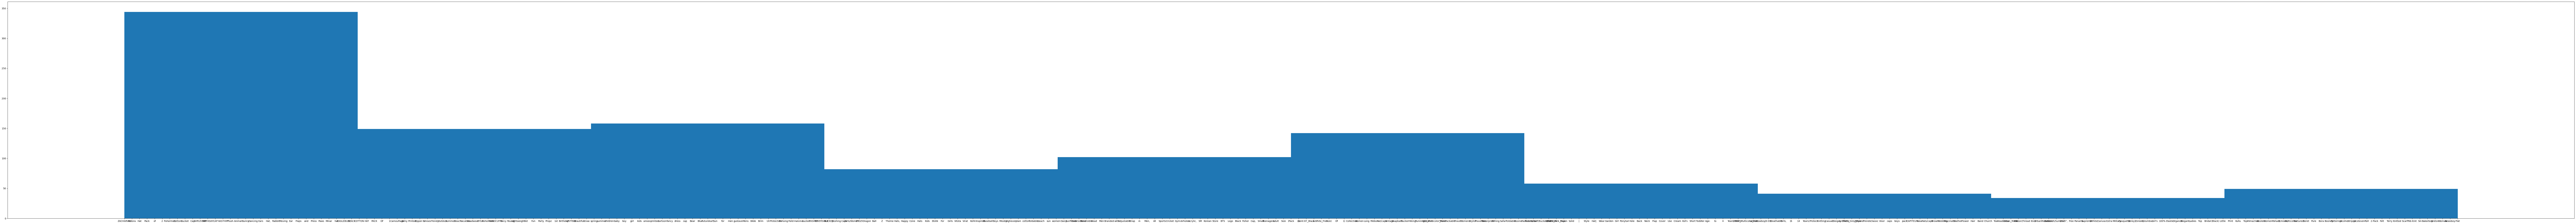

In [26]:
fig, ax = plt.subplots(figsize=(200, 17))
ax.hist(keyWords)

plt.show()


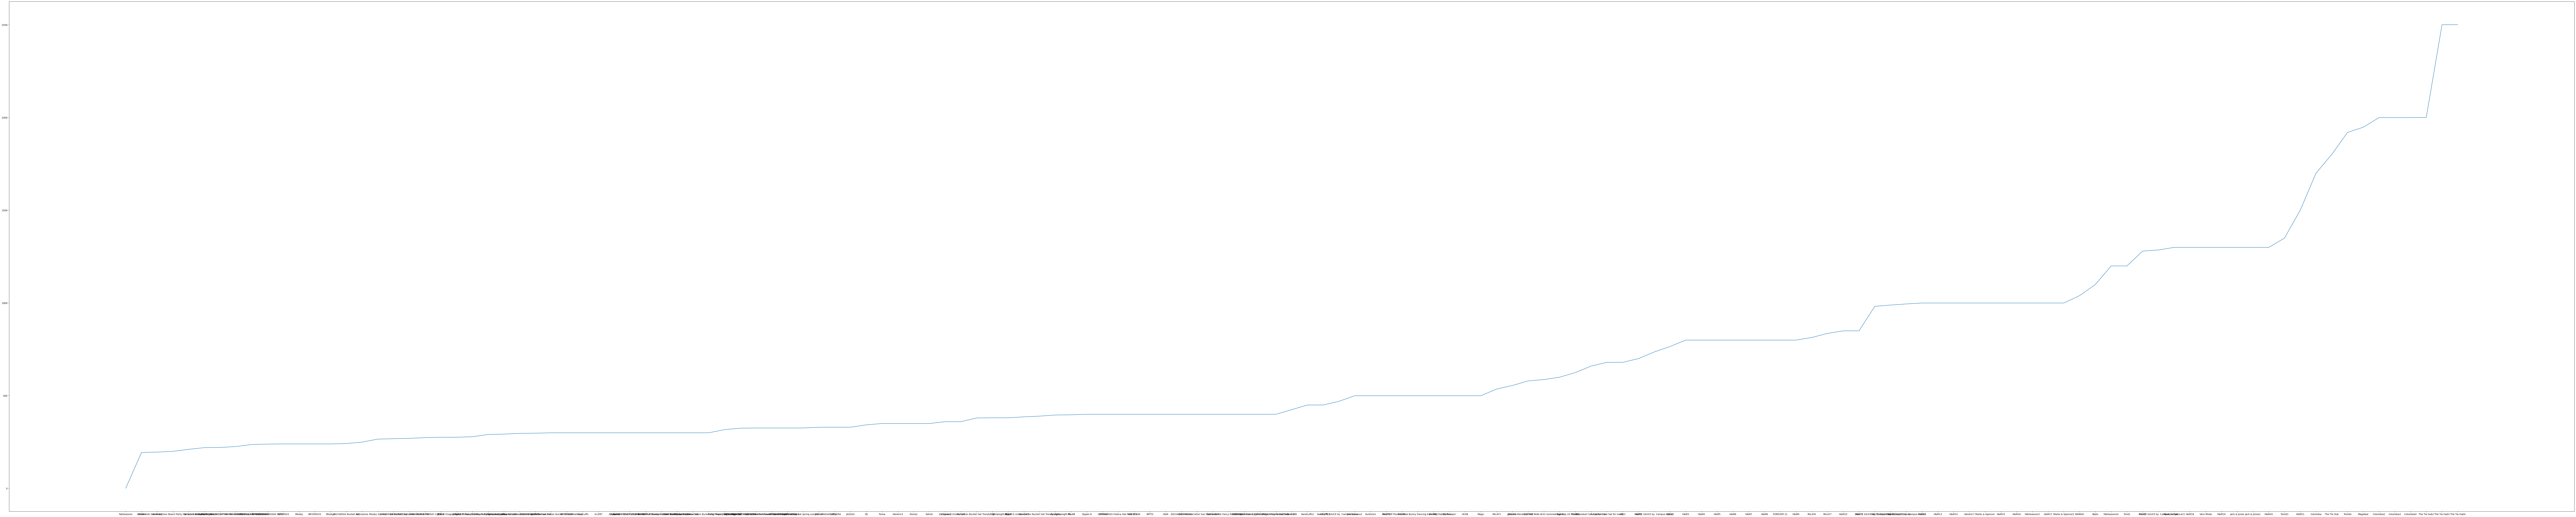

In [27]:
fig, ax = plt.subplots(figsize=(200, 40))
plt.plot(list(table.iloc[:,0]),list(table.iloc[:,2]))



In [46]:
cou=dict(Counter(keyWords).most_common(30))
for i in cou:
    print(i)


Hat
Bucket
Women
for
Cotton
Sun
Cap
Men
Summer
Beach
Unisex
Caps
Brim
and
Straw
ZACHARIAS
Outdoor
Girls
&
hat
Fedora
Wide
of
with
Printed
Protection
Hats
Baseball
Sports
(Pack


10
2500.0 [   0.  250.  500.  750. 1000. 1250. 1500. 1750. 2000. 2250. 2500.]


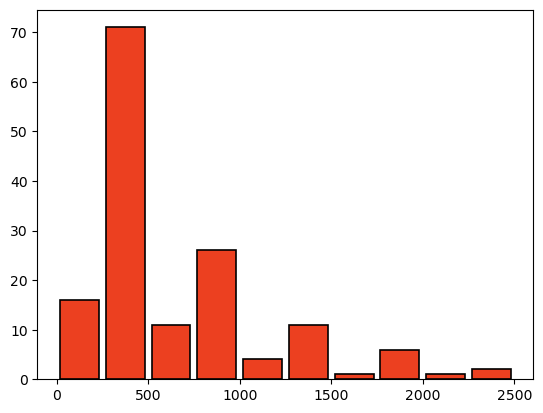

In [29]:
datarange=np.ptp(table[2])
binwidth=int(np.ceil(datarange/10))
numbins=int(np.ceil(datarange/binwidth))
print(numbins)

fig, ax = plt.subplots()
plt.style.use('dark_background')

bins = np.linspace(min(table[2]), max(table[2]), numbins + 1)
colors = ['red','blue','green','purple','orange','gray','cyan','magenta','red','blue']
plt.hist(list(table[2]), bins=bins,color='#EC4020', edgecolor='black', linewidth=1.2, rwidth=0.85)
plt.savefig('Figure1.png')
print(datarange,bins)

In [30]:
fig = px.histogram(table, x=2,title='Price Distribution',color_discrete_sequence=['#EC4020'])
fig.update_traces(marker_line_color='black',marker_line_width=1.5, opacity=0.75)

In [47]:
plt2=px.bar(table,x=2,y=0)
plt2.update_layout(
    yaxis=dict(
        tickangle=-45,
        tickfont=dict(size=6),
        automargin=True
    )
)
plt2

In [50]:
for i in range(1,20):
    itemPage=requests.get('https://www.amazon.in/s?k=pants&ref=nb_sb_noss_2').content
    idk=BeautifulSoup(itemPage,'html.parser')
    if idk.find('div',{'data-component-type': 's-search-result'})==None:
        print('none')
    else:
        print('success')

none
none
none
none
none
none
none
none
none
none
none
none
success
none
none
none
success
none
none
